In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\ml\\Decision_Tree_Handson\\heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#EDA--
#data analysis-- shape, info(), describe(), dtypes, corr()
#missing value analysis
#outlier analysis
#visualization--

#supervised model building part-- classification model
#independent and dependent data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum() # we dont have any null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

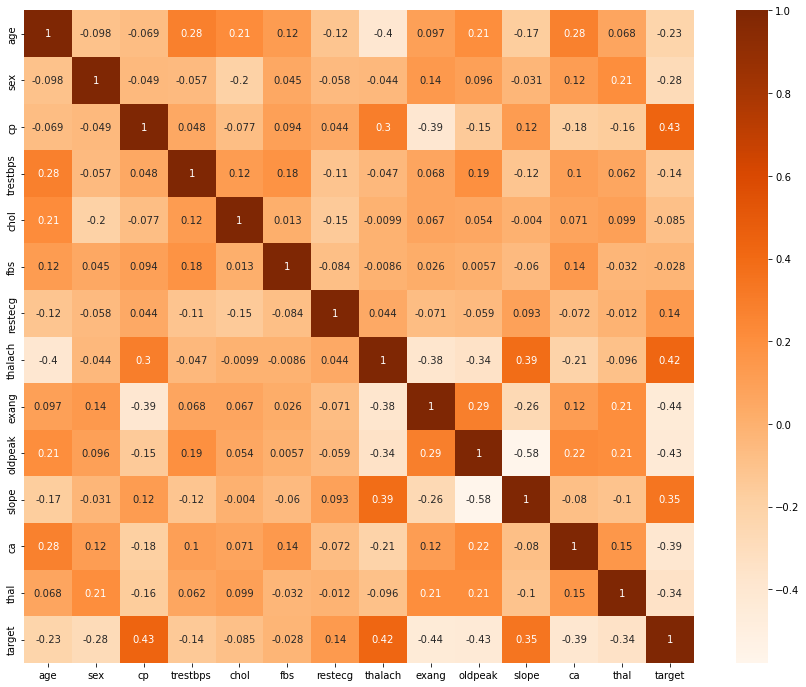

In [9]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),annot = True,cmap = "Oranges")
plt.show()

In [10]:
#lets now check weather our data is Normally distributed or not 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

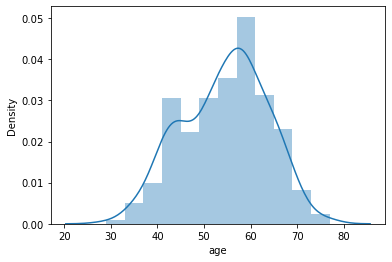

In [11]:
sns.distplot(df["age"]) #so here we can see that our data is almost normally distributed 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


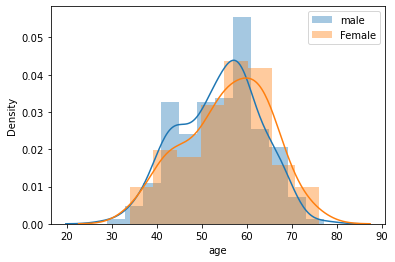

In [12]:
sns.distplot(df[df["sex"]==1]["age"],label = "male")
sns.distplot(df[df["sex"]==0]["age"],label = "Female")
plt.legend()
plt.show()
# we can see that both male and female are almost normally distribured

In [14]:
#lets check if there is any outliers present in our dataset

In [15]:
col = list(df.columns)

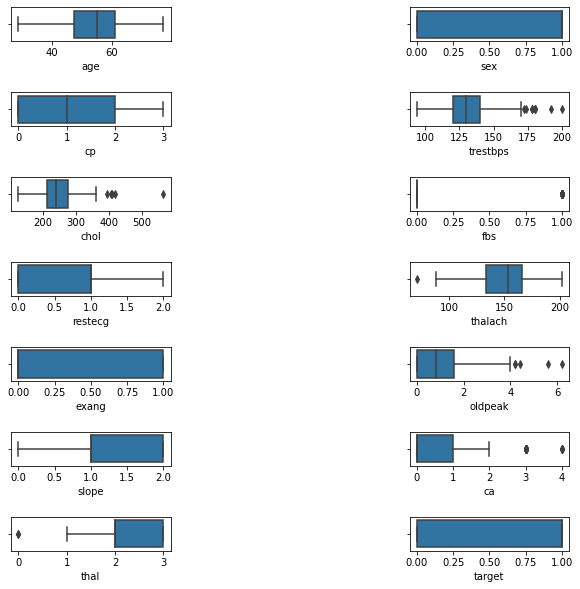

In [23]:
plt.figure(figsize = (10,10))
for p,q in enumerate(col,start = 1):
    plt.subplot(7,2,p)
    plt.subplots_adjust(wspace = 1.5,hspace = 1.5)
    sns.boxplot(x = df[q], data = df)
    

In [24]:
#we can see that the outliers presence is there 
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1
print(iqr)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [25]:
sss = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis = 1)]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


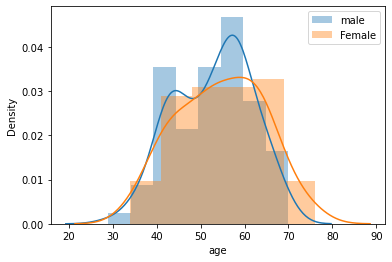

In [31]:
sns.distplot(sss[sss["sex"]==1]["age"],label = "male")
sns.distplot(sss[sss["sex"]==0]["age"],label = "Female")
plt.legend()
plt.show()

In [32]:
#Now our data is Normally distributed

In [33]:
#now lets visualise our data 

<AxesSubplot:xlabel='sex', ylabel='count'>

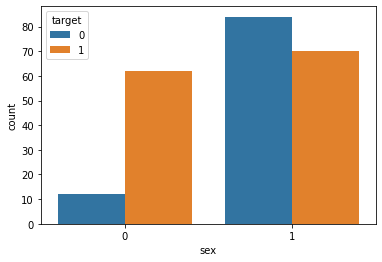

In [36]:
sns.countplot(sss["sex"],hue = sss["target"])

In [37]:
#here we can clearly see that number of unhealthy females are more compared to number of healthy females 
# and when we check the graphs of males we can see that the number of healthy males are more compared to 
# unhealthy males 

In [63]:
#lets now bin our age column

bins = [0,30,40,50,60,70,80]
labels = ["0-30","30-40","40-50","50-60","60-70","70-80"]
sss["age"] = pd.cut(df["age"],bins = bins,labels = labels)

C:\Users\HP\AppData\Local\Temp\ipykernel_11548\1080245363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sss["age"] = pd.cut(df["age"],bins = bins,labels = labels)


In [65]:
#supervised model building part-- classification model
#independent and dependent data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [66]:
#First lets seperate dependent and indendent data to x and y

In [67]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [68]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [70]:
#Now Lets divide our data to train and test set

from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 47)

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(272, 13)
(272, 1)
(31, 13)
(31, 1)


In [73]:
#creating the model
from sklearn import tree

In [74]:
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

In [75]:
#checking the accuracy of the model
from sklearn.metrics import accuracy_score

In [76]:
accuracy = accuracy_score(y_pred,y_test)
accuracy*100

83.87096774193549

In [62]:
#so here we got 84 precentage accuracy 

In [78]:
#lets check the confusion matrix 
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_pred,y_test)

array([[13,  2],
       [ 3, 13]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.87      0.81      0.84        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
# Precision: Precision is the ratio of true positives (TP) to the sum of true
#     positives and false positives (FP). In other words, precision measures the
#     proportion of predicted positives that are actually positive. A high precision
#     score indicates that the model is accurately predicting positive cases.

    
# Recall: Recall is the ratio of true positives (TP) to the sum of true positives and false negatives (FN). 
#     In other words, recall measures the proportion of actual positives that are correctly identified by the model.
#     A high recall score indicates that the model is identifying a large proportion of positive cases.

# F1 score: The F1 score is the harmonic mean of precision and recall. 
#     It balances the importance of precision and recall and provides a single score that
#     summarizes the overall performance of a binary classification model. 
#     A high F1 score indicates a good balance between precision and recall.

# Support: Support is the number of samples in each class in the dataset.
#     It represents the number of samples that belong to each class and is used to calculate precision,
#     recall, and F1 score.

# In the classification report, precision, recall, and F1 score are reported for each class in
# the classification model. The support value is also reported for each class, indicating the
# number of samples in that class. The classification report is a useful tool for evaluating
# the performance of a classification model, especially when dealing with imbalanced datasets
# where the number of samples in each class may vary significantly.